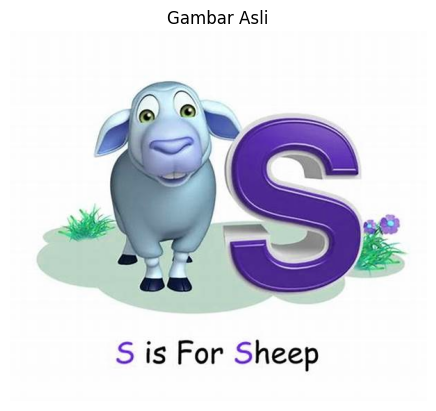

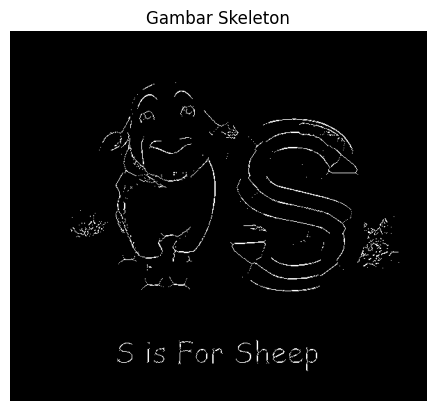

In [12]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Fungsi untuk menampilkan gambar
def display_image(image, title="Gambar"):
    plt.imshow(image, cmap='gray')
    plt.title(title)
    plt.axis('off')
    plt.show()

# Membaca gambar
image_path = "hewan.jpg"  # Ganti "hewan.jpg" dengan path gambar Anda
# Membaca gambar dengan warna asli
image = cv2.imread(image_path)

# Memeriksa apakah gambar berhasil dimuat
if image is None:
    print("Error: Tidak dapat memuat gambar.")
else:
    # Konversi gambar ke skala abu-abu
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Binerisasi gambar
    _, binary_image = cv2.threshold(gray_image, 127, 255, cv2.THRESH_BINARY_INV)

    # Terapkan operasi morfologi untuk mendapatkan skeleton
    size = np.size(binary_image)
    skel = np.zeros(binary_image.shape, np.uint8)

    element = cv2.getStructuringElement(cv2.MORPH_CROSS, (3,3))
    done = False

    while not done:
        eroded = cv2.erode(binary_image, element)
        temp = cv2.dilate(eroded, element)
        temp = cv2.subtract(binary_image, temp)
        skel = cv2.bitwise_or(skel, temp)
        binary_image = eroded.copy()

        # Hitung jumlah piksel non-nol dalam gambar biner
        zeros = size - cv2.countNonZero(binary_image)
        
        if zeros == size:
            done = True

    # Tampilkan gambar asli
    display_image(image, "Gambar Asli")

    # Tampilkan gambar skeleton
    display_image(skel, "Gambar Skeleton")
